# Pure Calculation

## Import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Input values



In [2]:
X = np.array([[-3,-2,-1,0,1,2,3]]).T
y = np.array([[7.5,3,0.5,1,3,6,14]]).T

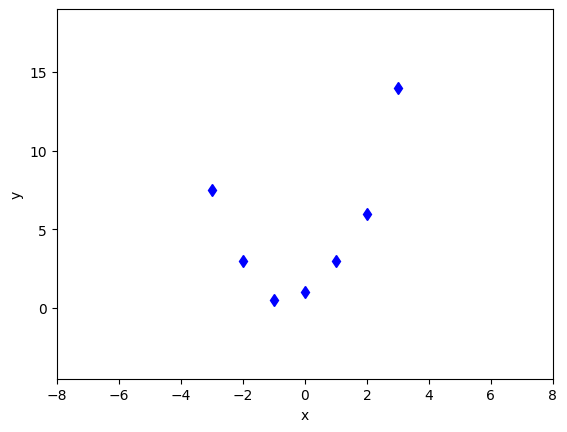

In [17]:
plt.plot(X,y,"bd")
plt.axis([X.min() - 5,  X.max() + 5 ,y.min() - 5 , y.max() + 5])
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## Calculate paramater

In [4]:
Xsum  = np.sum(X)
X2sum = np.sum(X**2)
X3sum = np.sum(X**3)
X4sum = np.sum(X**4)
countX = X.shape[0]
ysum  = np.sum(y)
XySum = np.sum(X*y)
X2ySum = np.sum(X**2*y)

In [5]:
Xsum,X2sum,X3sum,X4sum,countX,ysum,XySum,X2ySum

(0, 28, 0, 196, 7, 35.0, 28.0, 233.0)

## Solve Equation

In [6]:
equation = np.array([[countX,Xsum,X2sum],[Xsum,X2sum,X3sum],[X2sum,X3sum,X4sum]])
result = np.array([[ysum],[XySum],[X2ySum]])

In [7]:
solve = np.linalg.solve(equation,result)

In [8]:
solve

array([[0.57142857],
       [1.        ],
       [1.10714286]])

### Passed to variable

In [9]:
c,b,a =  solve[0][0],solve[1][0],solve[2][0]

In [10]:
print(f'y={a}x^2+{b}x+{c}')

y=1.1071428571428572x^2+1.0x+0.5714285714285714


In [20]:
x0 = np.linspace(X.min() - 3, X.max() +3 ,100)
y0 = a*x0**2+b*x0+c

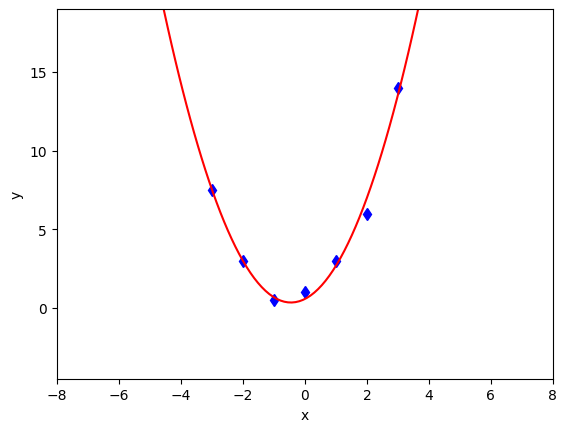

In [21]:
plt.plot(X,y,"bd")
plt.plot(x0, y0,"r")
plt.axis([X.min() - 5,  X.max() + 5 ,y.min() - 5 , y.max() + 5])
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# Use sklearn library

## Import library

In [43]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, SplineTransformer

## Add fuction

In [54]:
def f(x):
    return x * np.sin(x)- 3 * np.cos(x*2)
# whole range we want to plot
x_plot = np.linspace(-1, 11, 100)

In [55]:
x_train = np.linspace(0, 10, 100)
rng = np.random.RandomState(0)
x_train = np.sort(rng.choice(x_train, size=20, replace=False))
y_train = f(x_train)

# create 2D-array versions of these arrays to feed to transformers
X_train = x_train[:, np.newaxis]
X_plot = x_plot[:, np.newaxis]

## Calcute by sklearn and show it

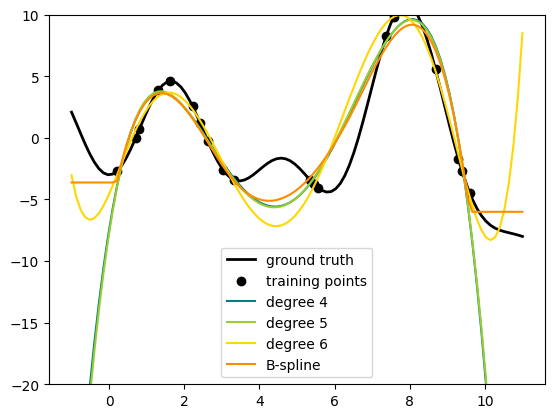

In [56]:
# plot function
lw = 2
fig, ax = plt.subplots()
ax.set_prop_cycle(
    color=["black", "teal", "yellowgreen", "gold", "darkorange", "tomato"]
)
ax.plot(x_plot, f(x_plot), linewidth=lw, label="ground truth")

# plot training points
ax.scatter(x_train, y_train, label="training points")

# polynomial features
for degree in [4, 5, 6]:
    model = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=1e-3))
    model.fit(X_train, y_train)
    y_plot = model.predict(X_plot)
    ax.plot(x_plot, y_plot, label=f"degree {degree}")

# B-spline with 4 + 3 - 1 = 6 basis functions
model = make_pipeline(SplineTransformer(n_knots=4, degree=3), Ridge(alpha=1e-3))
model.fit(X_train, y_train)

y_plot = model.predict(X_plot)
ax.plot(x_plot, y_plot, label="B-spline")
ax.legend(loc="lower center")
ax.set_ylim(-20, 10)
plt.show()

## Other fuction

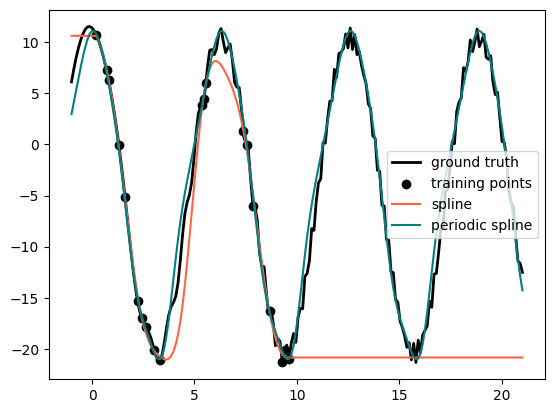

In [53]:
def g(x):
    """Function to be approximated by periodic spline interpolation."""
    return np.sin(x**2) + 15.4 * np.cos(x) - np.tanh(x*2) - 4


y_train = g(x_train)

# Extend the test data into the future:
x_plot_ext = np.linspace(-1, 21, 200)
X_plot_ext = x_plot_ext[:, np.newaxis]

lw = 2
fig, ax = plt.subplots()
ax.set_prop_cycle(color=["black", "tomato", "teal"])
ax.plot(x_plot_ext, g(x_plot_ext), linewidth=lw, label="ground truth")
ax.scatter(x_train, y_train, label="training points")

for transformer, label in [
    (SplineTransformer(degree=3, n_knots=10), "spline"),
    (
        SplineTransformer(
            degree=3,
            knots=np.linspace(0, 2 * np.pi, 10)[:, None],
            extrapolation="periodic",
        ),
        "periodic spline",
    ),
]:
    model = make_pipeline(transformer, Ridge(alpha=1e-3))
    model.fit(X_train, y_train)
    y_plot_ext = model.predict(X_plot_ext)
    ax.plot(x_plot_ext, y_plot_ext, label=label)

ax.legend()
fig.show()